# Инициализация



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import datetime
import random
from tqdm.notebook import tqdm
from PIL import Image
from PIL import ImageEnhance
import os
np.random.seed(1) #to have reproducible results 
pd.set_option('display.max_colwidth', None)

Mounted at /content/drive


# Количество изображений до аугментации

In [ ]:
paths = glob.glob('/content/drive/MyDrive/Colab Notebooks/alzheimer/VeryMildDemented*/*.jpg',recursive=True)
paths1 = glob.glob('/content/drive/MyDrive/Colab Notebooks/alzheimer/MildDemented*/*.jpg',recursive=True)
paths2 = glob.glob('/content/drive/MyDrive/Colab Notebooks/alzheimer/ModerateDemented*/*.jpg',recursive=True)
paths3 = glob.glob('/content/drive/MyDrive/Colab Notebooks/alzheimer/NonDemented*/*.jpg',recursive=True)
paths4 = glob.glob('/content/drive/MyDrive/Colab Notebooks/dementia/lewy_body*/*.jpg',recursive=True)
paths6 = glob.glob('/content/drive/MyDrive/Colab Notebooks/dementia/frontotemporal_dementia*/*.png',recursive=True)
paths7 = glob.glob('/content/drive/MyDrive/Colab Notebooks/dementia/vascular_dementia*/*.jpg',recursive=True)
print('Very Mild Demented:',len(paths))
print('Mild Demented:',len(paths1))
print('Moderate Demented:',len(paths2))
print('None Demented:',len(paths3))
print('Lewy Body:',len(paths4))
print('Frontotemporal Dementia:', len(paths6))
print('Vascular dementia:', len(paths7))

Very Mild Demented: 2240
Mild Demented: 896
Moderate Demented: 64
None Demented: 3200
Lewy Body: 5
Frontotemporal Dementia: 172
Vascular dementia: 36


#Данный код применялся к каждой группе изображений с разными размерами

In [ ]:
def resize_image(src_img, size=(208,176), bg_color="black"): 
    src_img.thumbnail(size, Image.ANTIALIAS)
    new_image = Image.new("L", size, bg_color)
    new_image.paste(src_img, (int((size[0] - src_img.size[0]) / 2), int((size[1] - src_img.size[1]) / 2)))
    return new_image
array = []
size = (176,208)
background_color="black"
for image in paths7:
  img = Image.open(image)
  new_image = resize_image(img, size, background_color)
  new_image = new_image.convert("L")
  array.append(new_image)
array

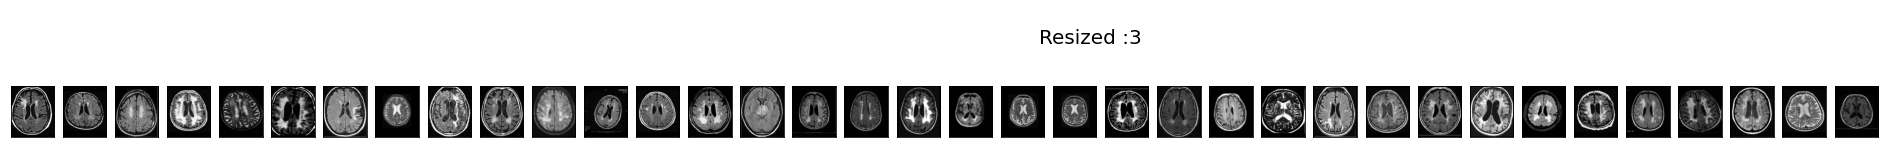

In [ ]:
i = 0
img_array = []
plt.figure(figsize=(40,8))
for item in array:
  # image = Image.open(item)
  #new_image = image.resize((176, 208))
  #img_array = np.array(new_image)
  plt.subplot(4, 43, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)    
  plt.imshow(item, cmap = 'gray')
  i += 1
plt.suptitle("\nResized :3", fontsize=20)
plt.show()

In [ ]:
for i, image in tqdm(enumerate(array)):
    directory = paths7[i].rsplit('/', 3)[0] + '/resized/' + paths7[i].rsplit('/', 2)[1]+ '/'
    os.makedirs(directory, exist_ok = True)
    image.save(directory + paths7[i].rsplit('/', 2)[2])
  #image = Image.open('/content/drive/MyDrive/Colab Notebooks/dementia/frontotemporal dementia*/*.png')
  # new_image = resize_image(img, size, background_color)
  # new_image = new_image.convert("L")
  #new_image.save('/content/drive/MyDrive/Colab Notebooks/dementia/frontotemporal dementia resized/.png')

0it [00:00, ?it/s]


#Переименовывание файлов для удобства работы


In [ ]:
# Function to rename multiple files
def main():
    folder = ('/content/drive/MyDrive/Colab Notebooks/resized/frontotemporal dementia/')
    for count, filename in enumerate(os.listdir(folder)):
        dst = f"FD_R {str(count)}.png"
        src =f"{folder}/{filename}"  # foldername/filename, if .py file is outside folder
        dst =f"{folder}/{dst}"
        # rename() function will
        # rename all the files
        os.rename(src, dst)
main()

# doing this every time to initialize 

In [ ]:
original = np.array([np.asarray(Image.open(img)) for img in paths])
print(original.shape)
mild = np.array([np.asarray(Image.open(img)) for img in paths1])
print(mild.shape)
moderate = np.array([np.asarray(Image.open(img)) for img in paths2])
print(moderate.shape)
none = np.array([np.asarray(Image.open(img)) for img in paths3])
print(none.shape)
lewy = np.array([np.asarray(Image.open(img)) for img in paths4])
print(lewy.shape)

# Этот код применялся для каждой группы, в которой не хватало изображений для сбалансированного набора данных

In [ ]:
def contrast():
  changed0 = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(1, 1, 1)))) for img in lewy1]
  # brightness = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(1, 0.5, 1)))) for img in changed_vascular]
  rotate = [np.asarray(Image.fromarray(img).rotate(np.random.choice([0, 90, 180, 270]))) for img in changed0]
  # # color = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(1, 1, 2)))) for img in rotate]
  # # contrast = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(2, 2, 2)))) for img in color]
  # # sharpness = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(1, 2, 1)))) for img in contrast]
  flip = [cv2.flip(img, np.random.choice([0, 1, -1])) if np.random.choice([0, 1]) else img for img in rotate]
  def save():
    changed = [Image.fromarray(img) for img in flip]
    for i, image in tqdm(enumerate(changed)):
      directory = paths5[i].rsplit('/', 3)[0] + '/augmented/' + paths5[i].rsplit('/', 2)[1]+ '/' + '04.'
      os.makedirs(directory, exist_ok = True)
      image.save(directory + paths5[i].rsplit('/', 2)[2])
    plt.figure(figsize=(12,3))
    l = 0
    for img in changed[0:36]:
      plt.subplot(3, 12, l+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(img, cmap='gray')
      l += 1
    plt.suptitle("changed :3", fontsize=20)
    plt.show()
    return 0
  save()
  return 0

0it [00:00, ?it/s]

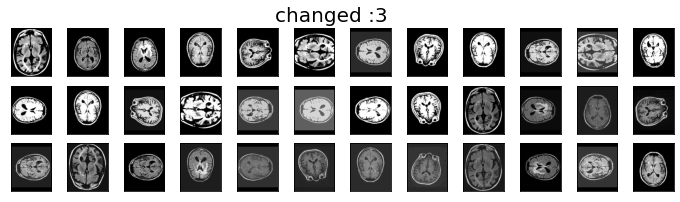

0

In [ ]:
contrast()

# SMOTE

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/dementia/NonDemented

In [ ]:
ls > '/content/drive/MyDrive/Colab Notebooks/dementia/nd.txt'

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/dementia/lewy body_resized

In [ ]:
ls > '/content/drive/MyDrive/Colab Notebooks/dementia/lb.txt'

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/dementia/frontotemporal dementia_a

In [ ]:
ls > '/content/drive/MyDrive/Colab Notebooks/dementia/fd.txt'

In [ ]:
def get_im_names_arrays(file_name):
    f = open(f'/content/drive/MyDrive/Colab Notebooks/dementia/{file_name}','r')
    target_array = []
    for line in f:
        target_array.append(line[:-1])
    return target_array


im_names_nd = get_im_names_arrays('nd.txt')
im_names_fd = get_im_names_arrays('fd.txt')
im_names_lb = get_im_names_arrays('lb.txt')

In [ ]:
import csv
import cv2
import os

#dementia typy codes: 0 not demented, 1 lewy body dementia

def generate_csv_table(im_names_data, folder_of_images, dem_type, table_name):
    dict_list = []
    fieldnames = []
    for i in range(208):
        for j in range(176):
            fieldnames.append(f'{str(i)}_{str(j)}')
    fieldnames += ['dementia_class']
    for name in im_names_data:
        img = cv2.imread(f'/content/drive/MyDrive/Colab Notebooks/dementia/{folder_of_images}/{name}',0)
        row = {}
        row['dementia_class'] = dem_type
        for i in range(208):
            for j in range(176):
                row[f'{str(i)}_{str(j)}'] = int(img[i][j])
        dict_list.append(row)
    with open(table_name + '.csv', 'a') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        if os.stat(table_name + '.csv').st_size == 0:
            writer.writeheader()
        writer.writerows(dict_list)

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/dementia/

In [ ]:
generate_csv_table(im_names_lb, 'lewy body_resized',1 , 'dementia_data')

In [ ]:
#generate_csv_table(im_names_fd, 'frontotemporal dementia_a',2 , 'dementia_data')

In [ ]:
generate_csv_table(im_names_nd[:1500], 'NonDemented',0 , 'dementia_data')

In [ ]:
generate_csv_table(im_names_nd[1500:], 'NonDemented',0 , 'dementia_data')

In [ ]:
import pandas as pd
df = pd.read_csv('dementia_data.csv')
df#.loc[1,'1_20']

In [ ]:
import pandas as pd
df = pd.read_csv('dementia_data.csv')
y = df.dementia_class.values
x = df.drop('dementia_class', axis=1).values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.01, random_state=42)

In [ ]:
df.dementia_class.value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smote, Y_smote = sm.fit_resample(x_train, y_train)

In [ ]:
print(X_smote.shape) 

In [ ]:
X_smote = X_smote.reshape(7401, 208, 176)

In [ ]:
import matplotlib.pyplot as plt
i = 0
plt.figure(figsize=(40,8))
for item in X_smote:
  plt.subplot(4, 43, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)    
  plt.imshow(item, cmap = 'gray')
  i += 1
plt.suptitle("\nSmoted :3", fontsize=20)
plt.show()